### 목표 : 생선 품종 분류 모델
  - 데이터 : 2가지 품종의 생선 데이터
  - 피처 : Weight, Length
  - 타겟 : Species
  - 유형 : 지도학습 / 분류

In [273]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  # 기계학습 관련 모듈

In [274]:
# 데이터 불러오기
data_file = pd.read_csv('../DATA/fish.csv', encoding='utf-8')
data_file

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [275]:
# 2개의 피처만 선택
fish_df = pd.DataFrame(data_file, columns=['Species', 'Weight', 'Length'])
# fish_df = pd.read_csv('../DATA/fish.csv', usecols=['Species', 'Weight', 'Length'])
fish_df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [276]:
# Bream, Smelt 품종만 추출
mask = fish_df.Species.isin(['Bream', 'Smelt'])
two_species_df = fish_df[mask]

# index 정리
two_species_df.reset_index(drop=True, inplace=True)
two_species_df

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


#### 2) 데이터 전처리

In [277]:
# 타겟 bool 처리
# two_species_df['Species'] = two_species_df['Species'].replace({'Bream': 0, 'Smelt': 1}).copy()
# - 오류 해결 방법 :
# 1) slice copy warning    : .loc[:, ]
# 2) type -> object        : .copy(deep=True)
two_species_df.loc[:, 'Species'] = two_species_df['Species'].replace({'Bream': 0, 'Smelt': 1}).copy(deep=True)
two_species_df.dtypes

Species     object
Weight     float64
Length     float64
dtype: object

In [278]:
# Species -> int로 변환
two_species_df['Species'] = two_species_df['Species'].astype(int)
two_species_df.dtypes

C:\Users\wjs31\AppData\Local\Temp\ipykernel_31504\1326719769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_species_df['Species'] = two_species_df['Species'].astype(int)


Species      int32
Weight     float64
Length     float64
dtype: object

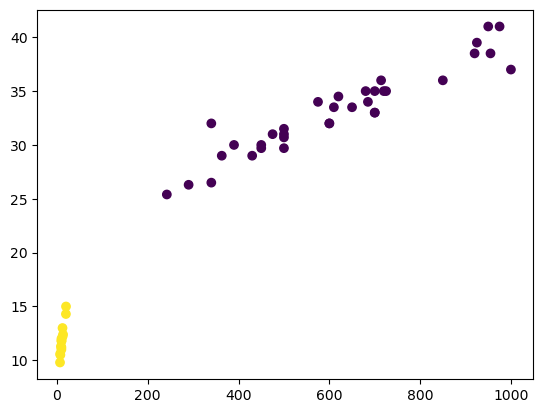

In [279]:
# weight와 length로 품종 구별이 가능한지 시각화 확인
plt.scatter(two_species_df['Weight'], two_species_df['Length'], c=two_species_df.Species)
plt.show()

#### 3) 기계학습을 위한 데이터 준비
- 피처 + 타겟
- 학습용 데이터셋   : 75%
- 테스트용 데이터셋 : 25%

In [280]:
# 데이터 섞기 -> 100% 모두 섞기
# - frac= : 전체 중 데이터셋 비율 (1. : 100%)
two_species_df = two_species_df.sample(frac=1.)

print(two_species_df.shape)
two_species_df.head()

(49, 3)


,Species,Weight,Length
42,1,9.9,11.8
18,0,610.0,33.5
43,1,9.8,12.0
27,0,714.0,36.0
19,0,650.0,33.5


In [281]:
# 학습과 테스트 비율 조절 갯수 계산
#   : 일반적으로 80:20
num = round(two_species_df.shape[0] *0.8)

# 학습 데이터셋 추출
train_df = two_species_df.iloc[:num+1]
print('train_df:', train_df.shape)
print(train_df.tail())

# 테스트 데이터셋 추출
#   : 학습 데이터셋 이후부터 추출
#   : 학습되지 않은 데이터로 테스트 진행
test_df = two_species_df.iloc[num+1:]
print('test_df:', test_df.shape)
print(test_df.tail())

# 이렇게 임의로 만들기엔 어렵고 설정할 게 많다

train_df: (40, 3)
    Species  Weight  Length
28        0   850.0    36.0
1         0   290.0    26.3
46        1    12.2    13.0
13        0   340.0    32.0
48        1    19.9    15.0
test_df: (9, 3)
    Species  Weight  Length
35        1     6.7     9.8
22        0   620.0    34.5
12        0   500.0    31.5
40        1     8.7    11.3
29        0  1000.0    37.0


### 3-2) scikit-learn 모듈
- 추가 모듈 로딩

In [282]:
from sklearn.model_selection import train_test_split

In [283]:
# [ feature와 target 분리 ]
feature_df = two_species_df.drop(['Species'], axis=1)
target_SR = two_species_df['Species']
print('target_SR :\n', target_SR.head(2))
print('feature_df :\n', feature_df.head(2))

target_SR :
 42    1
18    0
Name: Species, dtype: int32
feature_df :
     Weight  Length
42     9.9    11.8
18   610.0    33.5


In [284]:
# -- 임의로 비율 설정 없이 학습/테스트셋 분리
# : (전달) feature, target
# : (기본) shuffle=True, train:test = 0.75, 0.25
# : (반환) train features, test features, train labels, test labels

# : (parameters) 
#   (1) test_size=  : test의 비율 설정, train 자동 입력됨
#       train_size= : train의 비율 설정, test 자동 입력, 둘 중 하나만 넣으면 됨
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_SR, test_size=0.1)

print('X_train:', X_train.shape, ', y_train:', y_train.shape)
print(X_train, 'Rate :', sum(y_train), '/', len(y_train))
print('X_test:', X_test.shape, ', y_test:', y_test.shape)
print(X_test, 'Rate :', sum(y_test), '/', len(y_test))

X_train: (44, 2) , y_train: (44,)
    Weight  Length
1    290.0    26.3
41    10.0    11.8
20   575.0    34.0
6    500.0    29.7
8    450.0    30.0
0    242.0    25.4
12   500.0    31.5
10   475.0    31.0
7    390.0    30.0
31   955.0    38.5
44    12.2    12.2
29  1000.0    37.0
30   920.0    38.5
16   700.0    33.0
32   925.0    39.5
26   720.0    35.0
39     9.8    11.2
9    500.0    30.7
11   500.0    31.0
23   680.0    35.0
42     9.9    11.8
40     8.7    11.3
28   850.0    36.0
35     6.7     9.8
17   700.0    33.0
45    13.4    12.4
18   610.0    33.5
21   685.0    34.0
47    19.7    14.3
15   600.0    32.0
22   620.0    34.5
2    340.0    26.5
37     7.0    10.6
3    363.0    29.0
43     9.8    12.0
14   600.0    32.0
38     9.7    11.0
46    12.2    13.0
5    450.0    29.7
24   700.0    35.0
25   725.0    35.0
27   714.0    36.0
36     7.5    10.5
48    19.9    15.0 Rate : 14 / 44
X_test: (5, 2) , y_test: (5,)
    Weight  Length
4    430.0    29.0
34   950.0    41.0
33   975.

In [285]:
# " (Paramenters)
#   (2) stratify=   : target 비율이 불균일할 경우, 그 비율을 설정
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_SR, stratify=target_SR)

print('X_train:', X_train.shape, ', y_train:', y_train.shape)
print(X_train, 'Rate :', sum(y_train), '/', len(y_train))
print('X_test:', X_test.shape, ', y_test:', y_test.shape)
print(X_test, 'Rate :', sum(y_test), '/', len(y_test))

X_train: (36, 2) , y_train: (36,)
    Weight  Length
30   920.0    38.5
1    290.0    26.3
40     8.7    11.3
32   925.0    39.5
31   955.0    38.5
24   700.0    35.0
14   600.0    32.0
5    450.0    29.7
8    450.0    30.0
16   700.0    33.0
3    363.0    29.0
29  1000.0    37.0
26   720.0    35.0
21   685.0    34.0
44    12.2    12.2
25   725.0    35.0
19   650.0    33.5
38     9.7    11.0
0    242.0    25.4
23   680.0    35.0
11   500.0    31.0
41    10.0    11.8
10   475.0    31.0
2    340.0    26.5
4    430.0    29.0
39     9.8    11.2
20   575.0    34.0
15   600.0    32.0
9    500.0    30.7
45    13.4    12.4
36     7.5    10.5
42     9.9    11.8
18   610.0    33.5
46    12.2    13.0
35     6.7     9.8
6    500.0    29.7 Rate : 10 / 36
X_test: (13, 2) , y_test: (13,)
    Weight  Length
28   850.0    36.0
12   500.0    31.5
33   975.0    41.0
34   950.0    41.0
43     9.8    12.0
17   700.0    33.0
27   714.0    36.0
7    390.0    30.0
37     7.0    10.6
22   620.0    34.5
47    1

In [286]:
# 검증용 데이터셋 준비 => 학습용 데이터셋에서 분리
# - 학습  -> 학습 : X_train, y_train 에서 분리
#            검증 : X_val, y_val 을 생성
# - 테스트
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train)

### 4) 학습 진행
- 학습 방법 : 지도학습 / 분류 => KNN
- 모델 인스턴스 생성 => .fit()

In [287]:
# 모델 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [288]:
# 학습 진행 :학습용 데이터 진행 .fit(2D, 1D)
model.fit(X_train, y_train)

KNeighborsClassifier()

### 5) test 진행 : 학습에 사용되지 않은 데이터로 진행

In [289]:
model.score(X_val, y_val)

1.0

### 6) 모델 활용 예측 : 새로운 데이터로 진행

In [290]:
import numpy as np
model.predict(X_test), np.array(y_test) # 잘 맞다

(array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1]))

### 6-1) 사용자로부터 전달 받은 새로운 데이터에 대한 예측==> 학습할 때 전달되는 피처 형태와 동일한 데이터

In [291]:
# [ 길이 25, 무게 160인 생선의 품종 예측 ]
new_data = pd.DataFrame([[160, 25]], columns=two_species_df.columns[1:])
new_data

,Weight,Length
0,160,25


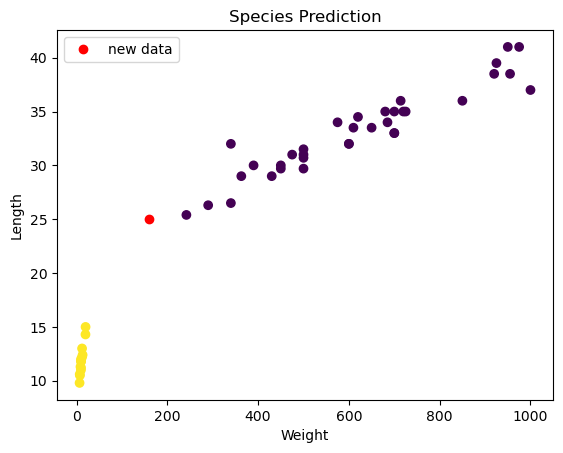

In [296]:
# 새로운 데이터와 학습 데이터의 시각화
plt.plot(new_data.Weight, new_data.Length, 'ro', label='new data')
plt.scatter(two_species_df.Weight, two_species_df.Length, c=two_species_df.Species, cmap='viridis')

plt.title('Species Prediction')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.legend()
plt.show()

In [293]:
# 생성된 모델로 새로운 데이터 품종 예측
model.predict(new_data)

array([1])

In [294]:
# 새로운 데이터의 최근접 데이터 추출
_, idx = model.kneighbors(new_data)
idx.tolist()[0]         # .tolist() : numpy array 를 list 로 변환

[20, 8, 25, 1, 21]

In [295]:
two_species_df.iloc[idx.tolist()[0]]

,Species,Weight,Length
15,0,600.0,32.0
20,0,575.0,34.0
21,0,685.0,34.0
18,0,610.0,33.5
11,0,500.0,31.0
